# Analysis of Physical Activity Monitoring Data

# Introduction


   Physical Activity Monitoring is a data which was collected by A. Reiss and D. Stricker. from 9 people when they did 18 different physical activities. The activities include: lying, sitting, standing, walking, running, cycling, Nordic walking, watching TV, computer work, car driving, climbing stairs, going down stairs, vacuum cleaning, ironing, folding laundry, house cleaning, playing soccer, and rope jumping. While the 9 subjects were performing these activities, there were 3 inertial measurement units (IMU) attached their body parts that were hand, chest and ankle, and a heart rate monitor that were recording their functions. 
    The 9 subjects are between 24 and 32 years old with 25-27 body mass index. 8 of them are male and dominant hands of 8 of them are right.

   The target of the analysis is to help the development of a product that can detect the amount and the type of the physical activity done by a person. This product can be a watch that collects information to evaluate calories burnt throughout the day. It should determine which activity done by user without asking to user what did (s)he do as an activity. 
   
   The analysis will present the relation between the types of physical activities on different people and the numerical values such as temperatures and heart rates of these people. For this purpose, the collected data will be cleaned. To clean, the instructions will be followed given by A. Reiss. Then, the data will be explored. The hypotheses will be created and tested. Furthermore, the analysis will give a model to indicate how the physical activities can be grouped by using machine learning techniques such as principle component analysis and supervised learning.

# Data Importing

   First of all, matrices (data frames) will be created from the collected data. One is the information of the subjects including sexes, ages, heights, weights, resting heart rates, maximum heart rates and dominant hands. The second includes the times in seconds of the activities done by the subjects. And the other includes all 54 data collected using IMU and heart rate monitor.

In [377]:
import pandas as pd
import numpy as np

In [378]:
subjectinformation = { #'SubjectID':[101,102,103,104,105,106,107,108,109], 
    'Sex' : ['M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], 
    'Age' : [27,25, 31,24,26,26,23,32,31],
    'Height' : [182,169,187,194,180,183,173,179,189],
    'Weight' : [83,78,92,95,73,69,86,87,65],
    'Resting HR': [75,74,68,58,70,60,60,66,54],
    'Max HR' : [193,195,189,196,194,194,197,188,189],
    'Dominant hand' : ['R','R','R','R','R','R','R','L','R']
}
 
subj_inf = pd.DataFrame(subjectinformation)
subj_inf.index=[101,102,103,104,105,106,107,108,109]
print(subj_inf)

    Sex  Age  Height  Weight  Resting HR  Max HR Dominant hand
101   M   27     182      83          75     193             R
102   F   25     169      78          74     195             R
103   M   31     187      92          68     189             R
104   M   24     194      95          58     196             R
105   M   26     180      73          70     194             R
106   M   26     183      69          60     194             R
107   M   23     173      86          60     197             R
108   M   32     179      87          66     188             L
109   M   31     189      65          54     189             R


In [379]:
activitiesperformance= { 
    101: [271.86 , 234.79, 217.16, 222.52, 212.64, 235.74, 202.64, 836.45, 0, 545.18, 158.88, 149.97, 229.4, 235.72, 271.13, 540.88, 0, 129.11],
    102: [234.29, 223.44, 255.75, 325.32, 92.37, 251.07, 297.38, 0,0, 0, 173.4, 152.11, 206.82, 288.79, 0,0,0, 132.61],
    103:[220.43, 287.6, 205.32, 290.35, 0, 0, 0, 0, 0, 0, 103.87, 152.72, 203.24, 279.74, 0, 0, 0 ,0 ],
    104: [230.46, 254.91, 247.05, 319.31, 0, 226.98, 275.32, 0, 0, 0, 166.92, 142.83, 200.36, 249.94, 0, 0,0,0],
    105: [236.98, 268.63, 221.31, 320.32, 246.45, 245.76, 262.7, 0, 1108.82, 0, 142.79, 127.25, 244.44, 330.33, 0, 284.87, 0, 77.32],
    106 : [233.39, 230.4, 243.55, 257.2, 228.24 ,204.85, 266.85, 0, 617.76, 0, 132.89, 112.7, 210.77, 377.43, 217.85, 287.13, 0, 2.55],
    107: [256.1, 122.81, 257.5, 337.19, 36.91, 226.79, 287.24, 0, 0, 0, 176.44, 116.16, 215.51, 294.98, 0, 0, 0 , 0],
    108: [241.64, 229.22, 251.59, 315.32, 165.31, 254.74, 288.87, 0, 687.24, 0, 116.81, 96.53, 242.91, 329.89, 236.49, 416.9, 181.24, 88.05],
    109: [0,0,0,0,0,0,0,0,685.49,0,0,0,0,0,273.27, 342.05, 287.88, 63.9]
}


act_perf = pd.DataFrame(activitiesperformance)
act_perf.index=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #activitiesID
print(act_perf)

       101     102     103     104      105     106     107     108     109
1   271.86  234.29  220.43  230.46   236.98  233.39  256.10  241.64    0.00
2   234.79  223.44  287.60  254.91   268.63  230.40  122.81  229.22    0.00
3   217.16  255.75  205.32  247.05   221.31  243.55  257.50  251.59    0.00
4   222.52  325.32  290.35  319.31   320.32  257.20  337.19  315.32    0.00
5   212.64   92.37    0.00    0.00   246.45  228.24   36.91  165.31    0.00
6   235.74  251.07    0.00  226.98   245.76  204.85  226.79  254.74    0.00
7   202.64  297.38    0.00  275.32   262.70  266.85  287.24  288.87    0.00
9   836.45    0.00    0.00    0.00     0.00    0.00    0.00    0.00    0.00
10    0.00    0.00    0.00    0.00  1108.82  617.76    0.00  687.24  685.49
11  545.18    0.00    0.00    0.00     0.00    0.00    0.00    0.00    0.00
12  158.88  173.40  103.87  166.92   142.79  132.89  176.44  116.81    0.00
13  149.97  152.11  152.72  142.83   127.25  112.70  116.16   96.53    0.00
16  229.40  

In [380]:
columnsNames=['timestamp', 'activityID', 'heart rate', 'hand temperature','hand acc2','hand acc3', 'hand acc4', 'hand acc5', 'hand acc6', 'hand acc7', 'hand gyro8', 'hand gyro9', 'hand gyro10', 'hand magnet11', 'hand magnet12', 'hand magnet13', 'hand orient14', 'hand orient15', 'hand orient16', 'hand orient17',
             'chest temperature', 'chest acc2','chest acc3', 'chest acc4', 'chest acc5', 'chest acc6', 'chest acc7', 'chest gyro8', 'chest gyro9', 'chest gyro10', 'chest magnet11', 'chest magnet12', 'chest magnet13', 'chest orient14', 'chest orient15', 'chest orient16', 'chest orient17',
             'ankle temperature','ankle acc2','ankle acc3', 'ankle acc4', 'ankle acc5', 'ankle acc6', 'ankle acc7', 'ankle gyro8', 'ankle gyro9', 'ankle gyro10', 'ankle magnet11', 'ankle magnet12', 'ankle magnet13', 'ankle orient14', 'ankle orient15', 'ankle orient16', 'ankle orient17']
print(len(columnsNames))

54


In [381]:
list1=[]

for i in range(9): #read .dat files as pandas data frame with a subject id column
    doc='/Users/bengisu/Downloads/PAMAP2_Dataset/Protocol/subject10'
    doc+=str(i+1)
    doc+='.dat'
    
   
    data1=pd.read_csv(doc, sep=" ", header=None)    
    data1.columns=columnsNames
    data1['subjectID']=i+1
    list1.append(data1)

data=pd.concat(list1)

print(data.head())

   timestamp  activityID  heart rate  hand temperature  hand acc2  hand acc3  \
0       8.38           0       104.0              30.0    2.37223    8.60074   
1       8.39           0         NaN              30.0    2.18837    8.56560   
2       8.40           0         NaN              30.0    2.37357    8.60107   
3       8.41           0         NaN              30.0    2.07473    8.52853   
4       8.42           0         NaN              30.0    2.22936    8.83122   

   hand acc4  hand acc5  hand acc6  hand acc7  ...  ankle gyro9  ankle gyro10  \
0    3.51048    2.43954    8.76165    3.35465  ...     0.009250     -0.017580   
1    3.66179    2.39494    8.55081    3.64207  ...    -0.004638      0.000368   
2    3.54898    2.30514    8.53644    3.73280  ...     0.000148      0.022495   
3    3.66021    2.33528    8.53622    3.73277  ...    -0.020301      0.011275   
4    3.70000    2.23055    8.59741    3.76295  ...    -0.014303     -0.002823   

   ankle magnet11  ankle magnet1

# Data Wrangling

To clean the data, the recommendations in the data collection information and the methods of data munging will be followed.

The use of the data from the first accelerometer (with the scale of ±16g) is recommended instead of the second accelerometer (with the scale of ±6g) therefore the columns of second accelerometer (acc5-6-7) will be deleted from the data. Moreover, it is stated that 14-17 orientation data is invalid and hence the columns of orientation data (orient14-15-16-17) will be deleted from the data.


In [382]:
#delete the selected columns
data.drop(['hand acc5', 'hand acc6', 'hand acc7','hand orient14', 'hand orient15', 'hand orient16', 'hand orient17','chest acc5', 'chest acc6', 'chest acc7','chest orient14', 'chest orient15', 'chest orient16', 'chest orient17','ankle acc5', 'ankle acc6', 'ankle acc7','ankle orient14', 'ankle orient15', 'ankle orient16', 'ankle orient17'], axis=1, inplace=True)
    
print(data.head())

   timestamp  activityID  heart rate  hand temperature  hand acc2  hand acc3  \
0       8.38           0       104.0              30.0    2.37223    8.60074   
1       8.39           0         NaN              30.0    2.18837    8.56560   
2       8.40           0         NaN              30.0    2.37357    8.60107   
3       8.41           0         NaN              30.0    2.07473    8.52853   
4       8.42           0         NaN              30.0    2.22936    8.83122   

   hand acc4  hand gyro8  hand gyro9  hand gyro10  ...  ankle acc2  \
0    3.51048   -0.092217    0.056812    -0.015845  ...     9.65918   
1    3.66179   -0.024413    0.047759     0.006474  ...     9.69370   
2    3.54898   -0.057976    0.032574    -0.006988  ...     9.58944   
3    3.66021   -0.002352    0.032810    -0.003747  ...     9.58814   
4    3.70000    0.012269    0.018305    -0.053325  ...     9.69771   

   ankle acc3  ankle acc4  ankle gyro8  ankle gyro9  ankle gyro10  \
0    -1.65569   -0.099797    

The data labeled with activityID=0 shows transient activities between the different activities and it is recommended that this activities be discarded in any kind of analysis. Hence, the data labeled with activityID=0 will be deleted.

In [383]:
 #delete rows with activityID is 0 (transient activities)
data.drop(data.index[(data['activityID'] == 0)], axis=0, inplace=True)
print(data.head())

       timestamp  activityID  heart rate  hand temperature  hand acc2  \
16047     168.85           1         NaN           31.3125    3.87845   
16048     168.86           1         NaN           31.3125    3.76455   
16049     168.87           1         NaN           31.3125    3.76883   
16050     168.88           1         NaN           31.3125    3.88192   
16051     168.89           1         NaN           31.3125    3.80207   

       hand acc3  hand acc4  hand gyro8  hand gyro9  hand gyro10  ...  \
16047   -3.96143   -8.20172    0.041972   -0.016219    -0.020628  ...   
16048   -4.03644   -8.20317   -0.007792    0.019109    -0.011781  ...   
16049   -3.99749   -8.08778   -0.010467   -0.029370    -0.009203  ...   
16050   -3.84694   -8.12508   -0.003035    0.015171    -0.036078  ...   
16051   -3.88531   -8.24161    0.025282   -0.003291    -0.026277  ...   

       ankle acc2  ankle acc3  ankle acc4  ankle gyro8  ankle gyro9  \
16047    -1.30048     2.17539    -9.88336    -0.059

To dispose of the data from NaN values, the rows that include a NaN value will be deleted.

In [384]:
data.isna().sum().sum() #number of NaN values in the data frame

535983

In [385]:
data.dropna(inplace=True) #drop NaN values

print(data)

        timestamp  activityID  heart rate  hand temperature  hand acc2  \
16057      168.95           1        87.0           31.3125   3.727290   
16068      169.06           1        87.0           31.3125   3.760800   
16079      169.17           1        87.0           31.3125   3.760540   
16090      169.28           1        87.0           31.3125   3.688700   
16101      169.39           1        87.0           31.3125   3.801800   
...           ...         ...         ...               ...        ...   
383278    3838.67          24       182.0           30.8125 -24.554700   
383289    3838.78          24       182.0           30.8125 -10.441900   
383300    3838.89          24       182.0           30.8125   0.206305   
383311    3839.00          24       183.0           30.8125  -3.265650   
383322    3839.11          24       183.0           30.8125  -6.867330   

        hand acc3  hand acc4  hand gyro8  hand gyro9  hand gyro10  ...  \
16057    -3.96026   -8.20399    0.018

The purpose is finding activityID and time according to the other values. Adding 'time' column that consists of the time taken by each subject for each activity will be useful. This information is in 'activities performance' doc and act_perf data frame.

In [386]:
#add a 'time' column that consists of the time taken by activities for each person
list1=[]
for i in range(50660):
    a=data['activityID'].iloc[i]
    b=data['subjectID'].iloc[i]
    list1.append(act_perf.loc[a,b+100]) #call the time which is in the activityID=a and subjectID=100+b
data['time'] = list1
print(data)

        timestamp  activityID  heart rate  hand temperature  hand acc2  \
16057      168.95           1        87.0           31.3125   3.727290   
16068      169.06           1        87.0           31.3125   3.760800   
16079      169.17           1        87.0           31.3125   3.760540   
16090      169.28           1        87.0           31.3125   3.688700   
16101      169.39           1        87.0           31.3125   3.801800   
...           ...         ...         ...               ...        ...   
383278    3838.67          24       182.0           30.8125 -24.554700   
383289    3838.78          24       182.0           30.8125 -10.441900   
383300    3838.89          24       182.0           30.8125   0.206305   
383311    3839.00          24       183.0           30.8125  -3.265650   
383322    3839.11          24       183.0           30.8125  -6.867330   

        hand acc3  hand acc4  hand gyro8  hand gyro9  hand gyro10  ...  \
16057    -3.96026   -8.20399    0.018

# Exploratory Data Analysis

To explore the features of the data, Firstly, the data will be splitted into two parts randomly: train and test. To be sure that the conclusions is testable for future references, it will be split into with a random state that will fix the random value. 

Train data will be used for exploratory data analysis. Each key of data will be compared the other keys and graphs will be plotted to understand clearly how data behaves. The learning outcomes will be used as hypotheses.

In [387]:
#split data into test and train data

from sklearn.model_selection import train_test_split

    
train,test=train_test_split(data, test_size=0.5, random_state=7) 



print(train.shape)
print(test.shape)

(25330, 35)
(25330, 35)


To see the statistical summary of all columns of the train data, describe method of pandas library can be useful.

In [388]:
print(train.describe()) #the summary of data

          timestamp    activityID    heart rate  hand temperature  \
count  25330.000000  25330.000000  25330.000000      25330.000000   
mean    1101.360472      7.431780     91.955863         33.078477   
std     1003.677427      7.119313     22.530201          1.596098   
min      166.160000      1.000000     57.000000         27.937500   
25%      533.660000      2.000000     76.000000         32.500000   
50%      726.820000      3.000000     86.000000         33.437500   
75%     1050.290000     17.000000    102.000000         34.187500   
max     4245.650000     24.000000    183.000000         35.500000   

          hand acc2     hand acc3     hand acc4    hand gyro8    hand gyro9  \
count  25330.000000  25330.000000  25330.000000  25330.000000  25330.000000   
mean      -3.029363      3.403560      4.299188      0.023053      0.029338   
std        5.712783      5.493817      3.988352      1.116753      0.817064   
min      -54.067400    -62.459900    -48.603200    -14.739100 

The remarkable part is the hand temperatures. Even though the temperature of a healthy person is 36.5, in this data, the hand temperatures are between 27°C and 35.5°C. However, the standard deviation is small (1.5). The standard deviation shows that the hand temperatures of people when doing different exercises does not change that much and the temperatures are consistent. To be sure, the temperature data collecting from different body parts will be examined using box plots.

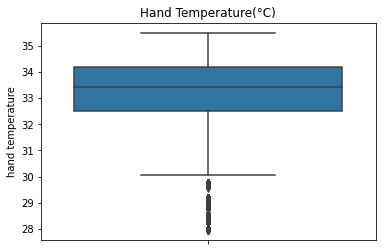

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
plt.title("Hand Temperature(°C)")
ax = sns.boxplot(y=train["hand temperature"])

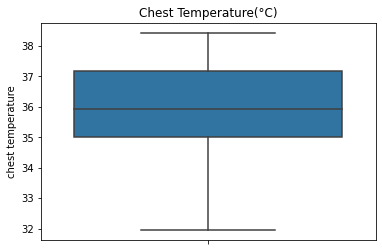

In [390]:
fig, ax = plt.subplots()
plt.title("Chest Temperature(°C)")
ax = sns.boxplot(y=train["chest temperature"])

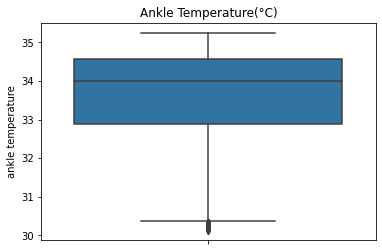

In [391]:
fig, ax = plt.subplots()
plt.title("Ankle Temperature(°C)")
ax = sns.boxplot(y=train["ankle temperature"])

The temperature data collecting from different body parts are mostly smaller than 36.5 °C. Even the maximum temperatures of ankle and hand are smaller than 36.5 °C. The mean of chest temperature is bigger than both the means of ankle and hand temperature. These results indicate that the room temperatures affect all data consistently. The data can be useful for comparing the temperatures but not efficient for finding exact body temperature which is 36.8±0.4 °C.

To learn the correlations between the columns of data, a heatmap will be used. Before creating a heatmap, timestamp, subjectID and activityID will be dropped. Because subjectID and activityID are not numbers that shows numerical values but they are codes for categorical values. For example, subjectID=2 is not the double of subjectID=1. And because timestamp is not the time passing through the exercise, it shows the times as points therefore, it increases constantly. Hence timestamp is just correlated with constantly increasing values, it does not give so much information.



In [392]:
train_hm=train.drop(['subjectID', 'activityID', 'timestamp'], axis=1, inplace=False)

Text(0.5, 1.0, 'Correlation Heatmap of the Train Data')

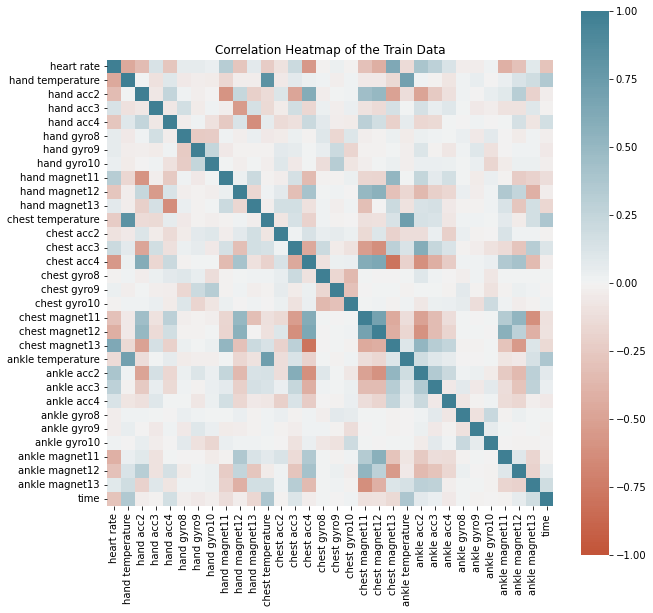

In [393]:
import seaborn as sns
corr = train_hm.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_title('Correlation Heatmap of the Train Data')

To see the details, the figure size will be enlarged and correlation coefficients will be added into heatmap. It will be used via zoom in.

Text(0.5, 1.0, 'Correlation Heatmap of the Train Data')

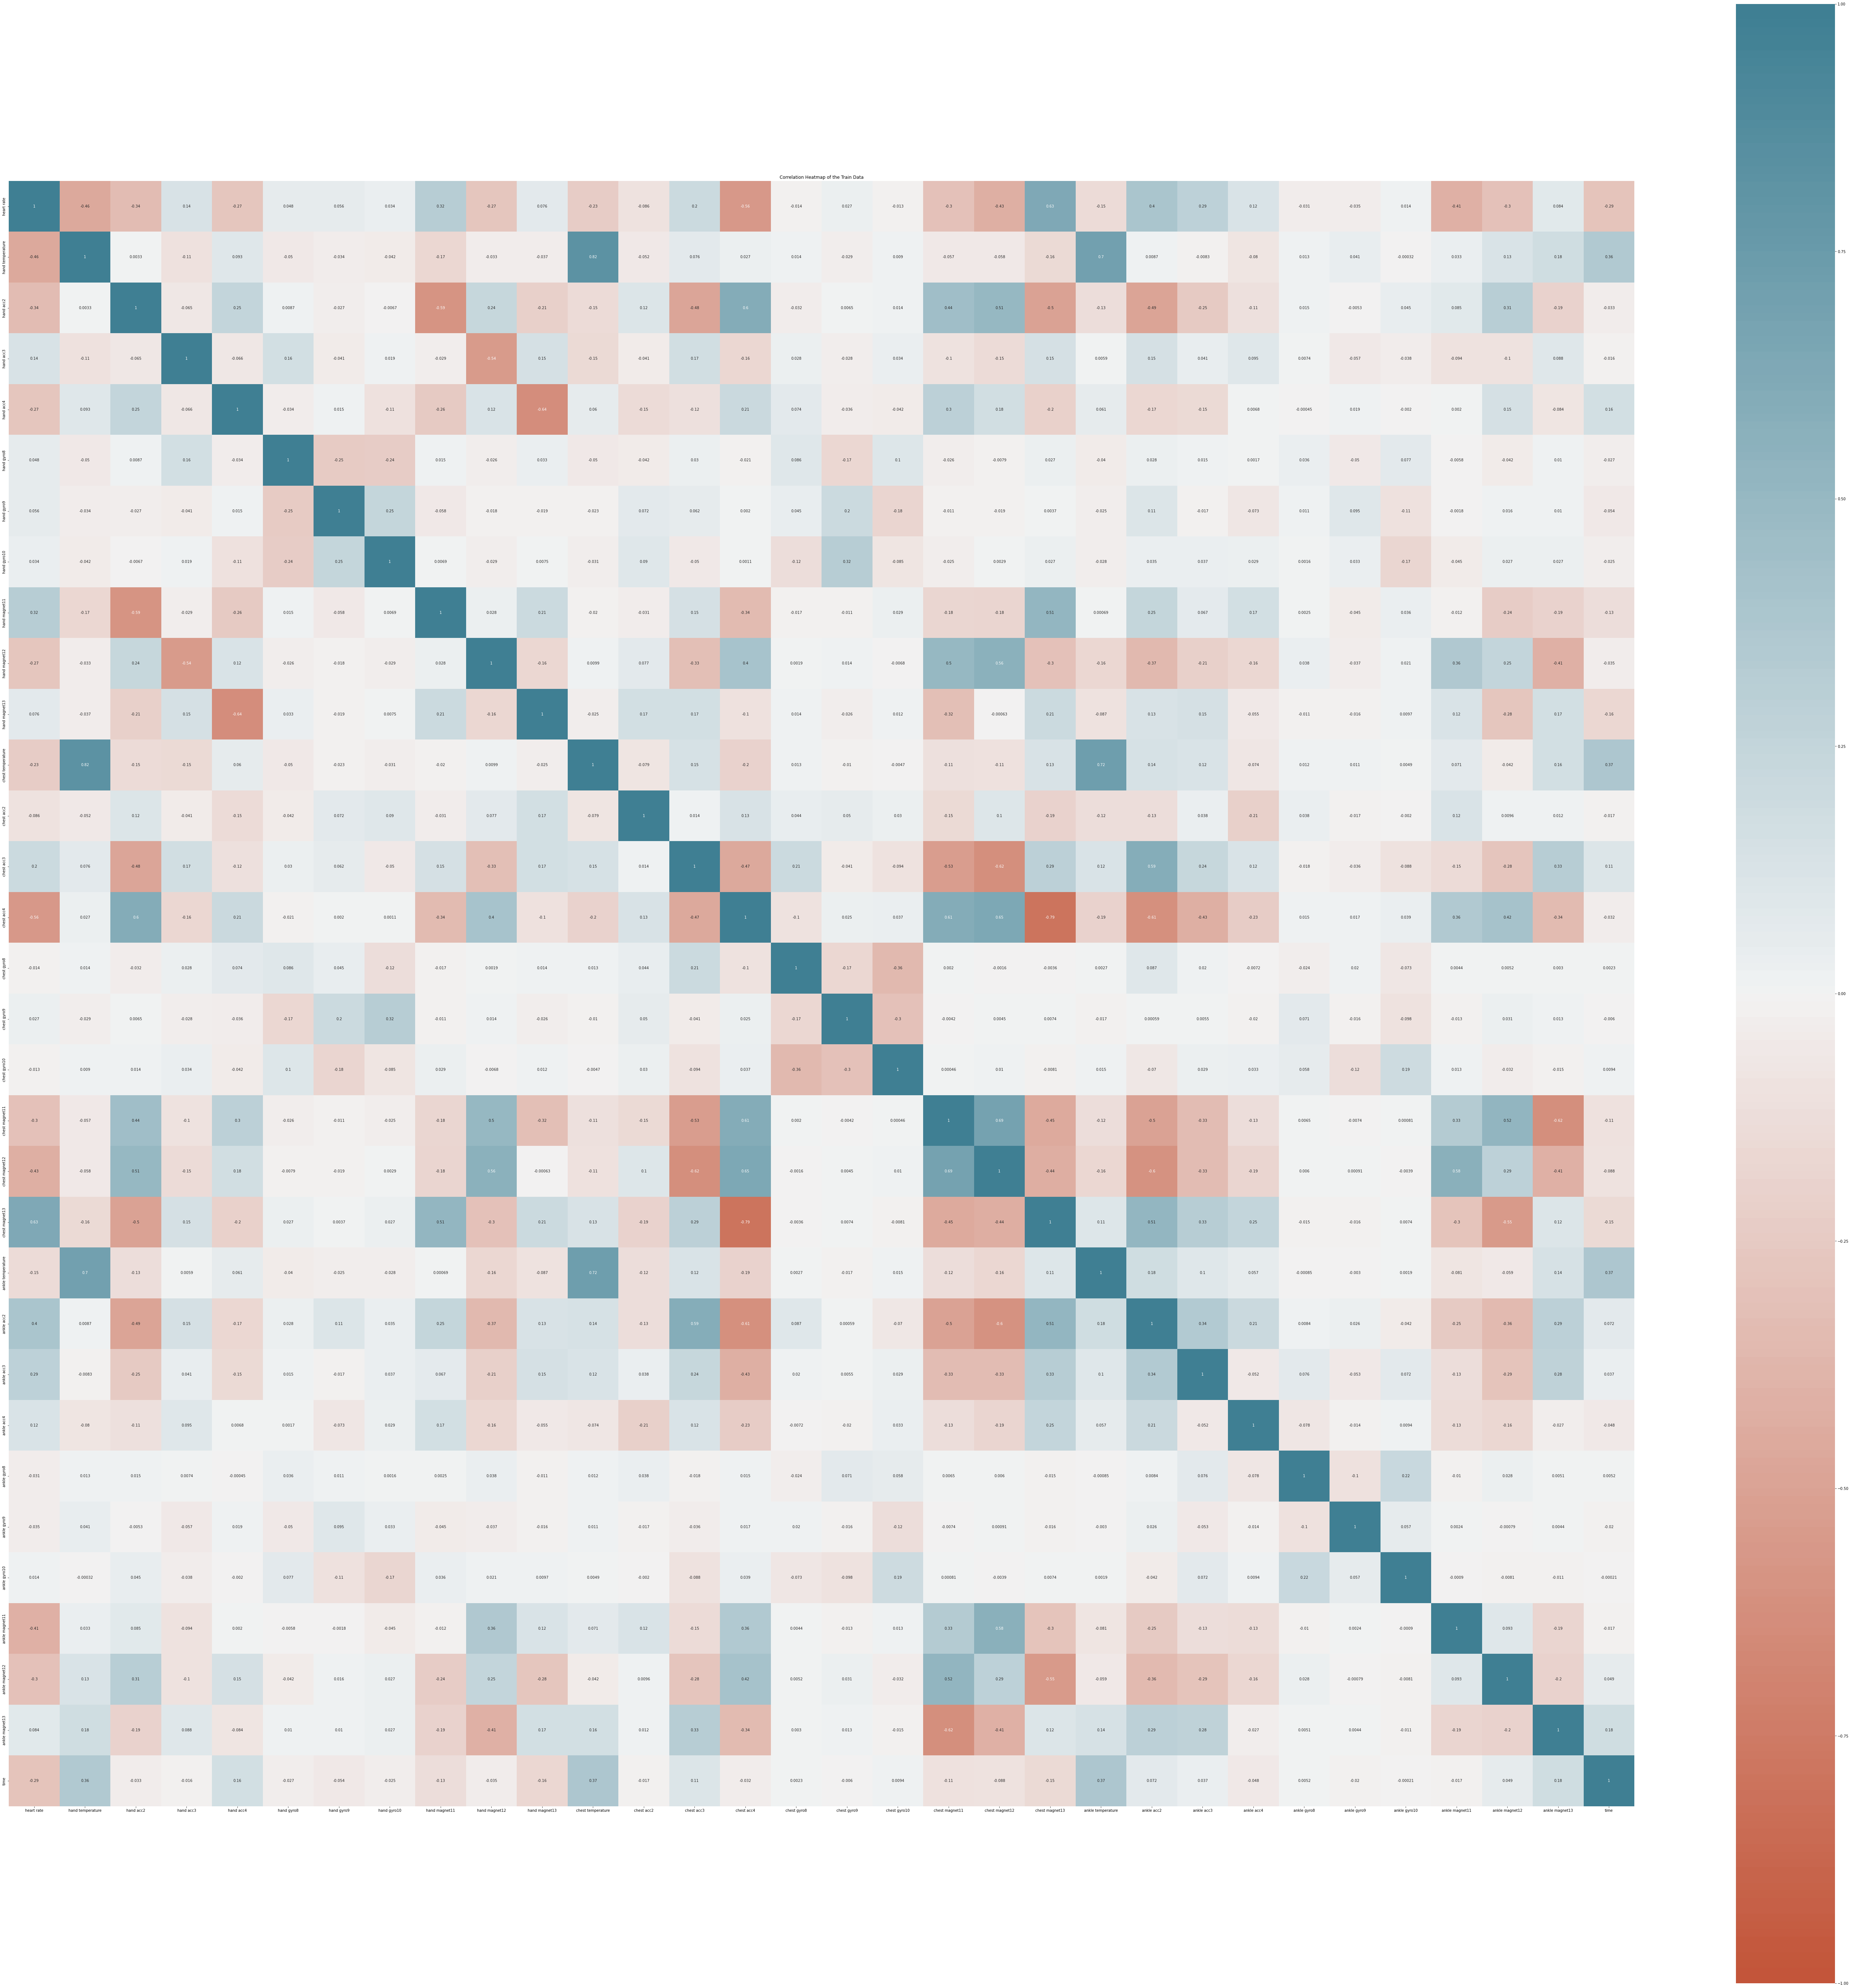

In [394]:
fig, ax = plt.subplots(figsize=(100,100))  
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
ax.set_title('Correlation Heatmap of the Train Data')

The most remarkable correlation is that time is positively correlated with hand temperature, ankle temperature and chest temperature and negatively correlated with heart rate. Time is negatively correlated with heart rate.

Acceleration data and magnetometer data are correlated each others.

Furthermore, the gyroscope data mostly uncorrelated with the other data. This will be investigated more when looking the correlations of activityID.

The correlation between time - heart rate can be examined as follows:

[Text(0.5, 1.0, 'Comparison of Time(s) data - Heart Rate(bpm)')]

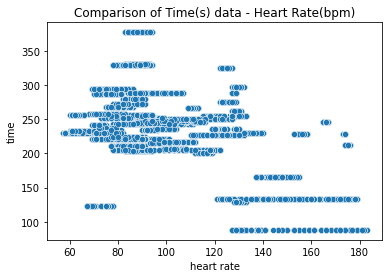

In [395]:
sns.scatterplot(data=train, y='time', x= 'heart rate').set(title='Comparison of Time(s) data - Heart Rate(bpm)')

The correlation between time - hand temperature can be examined as follows:

[Text(0.5, 1.0, 'Comparison of Time(s) data - Hand Temperature(°C)')]

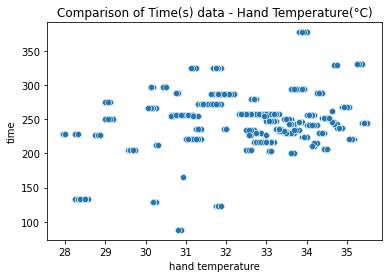

In [396]:
sns.scatterplot(data=train, y='time', x= 'hand temperature').set(title='Comparison of Time(s) data - Hand Temperature(°C)')

The correlation between time - ankle temperature can be examined as follows:

[Text(0.5, 1.0, 'Comparison of Time(s) data - Ankle Temperature(°C)')]

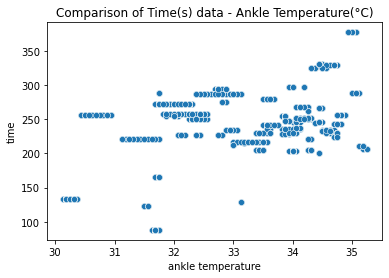

In [397]:
sns.scatterplot(data=train, y='time', x= 'ankle temperature').set(title='Comparison of Time(s) data - Ankle Temperature(°C)')

The correlation between time - chest temperature can be examined as follows:

[Text(0.5, 1.0, 'Comparison of Time(s) data - Chest Temperature(°C)')]

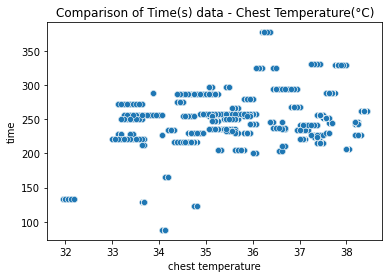

In [398]:
sns.scatterplot(data=train, y='time', x= 'chest temperature').set(title='Comparison of Time(s) data - Chest Temperature(°C)')

There is no strong relation, it looks like temperature and heart rate varies not depending on time. It is hard to create a hypothesis from these graphs but they can be useful for the modelling.

 To understand the categorical data, the data will be arranged according to'activityID' and 'subjectID'. The mean of the others data will found where the rows with same activity ID and same subject ID. 

In [399]:
# Groupby multiple columns
train_arr = train.groupby(['activityID','subjectID']).mean()

In [400]:
train_arr

timestamp  heart rate  hand temperature  hand acc2  \
activityID subjectID                                                         
1          1           230.397647   82.711230         31.598708   6.360335   
           2           228.024104   76.534196         33.753235   6.035290   
           3           229.578131   75.295826         31.210753   7.054931   
           4           229.671164   67.778182         32.797727   5.390345   
           5           228.858980   73.953488         34.831731   0.832211   
           6           228.968993   63.753597         33.410971   4.956741   
           7           229.099522   61.479522         30.921182   0.448870   
           8           228.127967   71.924214         34.126386   6.453465   
2          1           513.929207   92.803448         32.589440  -6.864823   
           2           528.581096   79.753425         33.954053  -2.945606   
           3           626.236772   76.097368         31.882675  -0.337119   
           4           541.543992   80.756487         32.960080  -2.907008   
           5           575.147094   79.257869         34.975711   0.971528   
           6           544.107711   75.641651         33.510553  -0.711388   
           7           499.818765   73.135802         31.837963  -1.785710   
           8           533.011512   73.720090         34.360609  -2.000215   
3          1           658.326549  103.178992         32.949692  -3.418256   
           2           675.706742   88.875000         34.086104  -8.535316   
           3           942.728081   83.296296         32.575968  -7.485120   
           4           687.113373  100.665685         33.117912  -7.827285   
           5           719.606742   91.702247         35.110253  -4.351431   
           6           688.967422   82.242236         33.597147  -6.828025   
           7           646.113901   74.051232         32.955850  -9.018856   
           8           681.409320   80.916782         34.470787  -8.257380   
4          2          2919.427644  124.060423         31.556647 -10.803567   
5          1          3340.114308  174.938462         30.283654  -6.712199   
           5          3416.938258  136.200000         33.814113  -6.184769   
           6          3426.074044  165.580882         28.132353  -6.683570   
           8          3502.468750  145.750000         30.937500 -11.868586   
6          1          2916.196919  124.744186         31.773983  -2.408513   
           2          3819.195084  125.039106         29.109986  -4.709779   
           4          3027.063226  120.419355         28.838206  -8.230959   
           5          3025.120103  114.391753         34.657216  -3.675509   
           6          3026.502266  113.351562         29.687012  -4.589107   
           7          2924.123343  125.502959         32.845414  -5.120732   
           8          2923.615237  126.207101         31.030141  -6.485173   
7          2          3425.738705  128.402878         30.284622  -9.044931   
           4          2860.717598  125.730392         29.066483  -7.032760   
           5          2859.571535  129.381395         34.625000  -2.395562   
           6          2861.340870  111.282609         30.175815  -6.183053   
           8          3337.662676  128.140845         30.762324  -3.751335   
16         1          1338.993476  134.004762         33.644345  -7.809057   
           2          1335.549153  103.010582         34.475529  -5.797367   
           3          1335.743286   87.852381         33.107440  -8.239487   
           4          1336.180860  115.387097         33.676411  -7.927607   
           5          1335.649016   92.279793         35.437500  -7.725314   
           6          1336.222462   84.389744         34.133974  -7.378021   
           7          1336.303352   96.780220         34.234890  -7.336820   
           8          1335.474833  100.842105         34.743122  -8.283231   
17         1           992.210829   98.787565 

To call data easily, the indexes (activityID and subjectID) will be arranged as columns.

In [401]:
train_arr=train_arr.reset_index()
print(train_arr)

    activityID  subjectID    timestamp  heart rate  hand temperature  \
0            1          1   230.397647   82.711230         31.598708   
1            1          2   228.024104   76.534196         33.753235   
2            1          3   229.578131   75.295826         31.210753   
3            1          4   229.671164   67.778182         32.797727   
4            1          5   228.858980   73.953488         34.831731   
5            1          6   228.968993   63.753597         33.410971   
6            1          7   229.099522   61.479522         30.921182   
7            1          8   228.127967   71.924214         34.126386   
8            2          1   513.929207   92.803448         32.589440   
9            2          2   528.581096   79.753425         33.954053   
10           2          3   626.236772   76.097368         31.882675   
11           2          4   541.543992   80.756487         32.960080   
12           2          5   575.147094   79.257869         34.97

To expose the correlation between activityID and the other columns, Spearman correlation coefficient can be useful rather than Pearson's correlation coefficient. Because Pearson's correlation indicates linearity. Activity ID is a categorical data thus the linearity is not meaningful, for example the activity ID=2 is not the double of the activity ID=1.

Spearman correlation coefficient between the activityID and activityID is 1.0 


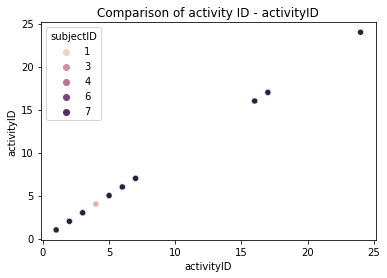

Spearman correlation coefficient between the activityID and timestamp is 0.6820937621944296 


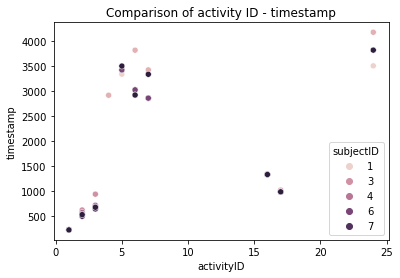

Spearman correlation coefficient between the activityID and heart rate is 0.5677211846081233 


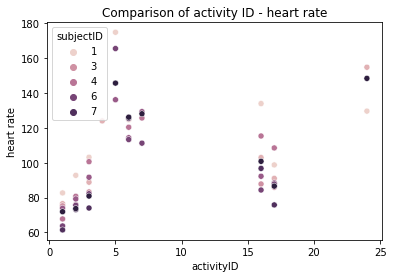

Spearman correlation coefficient between the activityID and chest acc4 is -0.6522343199912025 


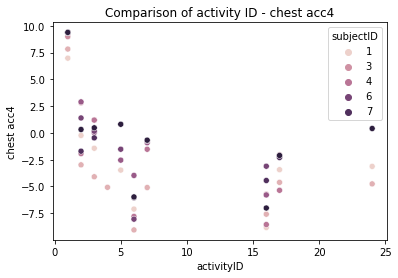

Spearman correlation coefficient between the activityID and chest magnet12 is -0.5441302663538398 


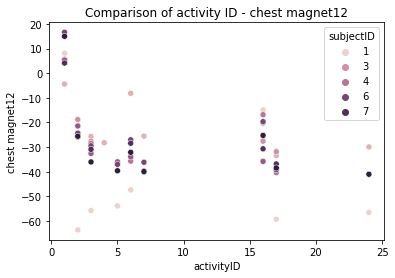

Spearman correlation coefficient between the activityID and chest magnet13 is 0.5374139906942573 


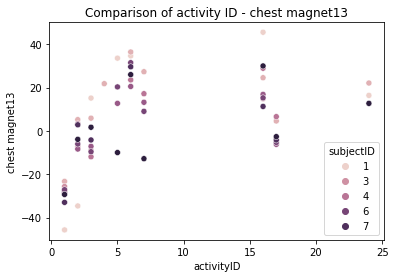

Spearman correlation coefficient between the activityID and ankle acc2 is 0.6199402278613769 


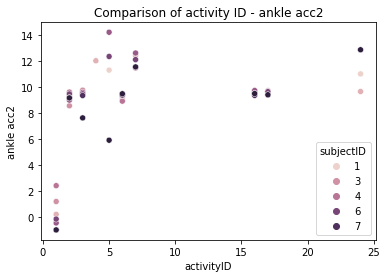

Spearman correlation coefficient between the activityID and ankle magnet11 is -0.5423392595112845 


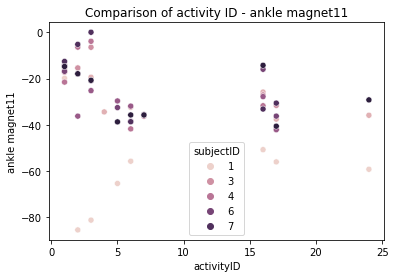

In [402]:
import scipy.stats as stats

actID_array=np.array(train_arr['activityID'])

for key in train_arr.keys():
  #create array of columns

    y_array=np.array(train_arr[key])


  
    spearman=stats.spearmanr(actID_array,y_array)
    if spearman[0]>0.5 or spearman[0]<-0.5 : #state remarkable spearman coefficients
        print("Spearman correlation coefficient between the activityID and {} is {} ".format(key, spearman[0]))
    
    #plot key-activityID array and paint according to subjectID
        sns.scatterplot(data=train_arr, x='activityID', y=key, hue='subjectID').set(title='Comparison of activity ID - '+key)
        
        plt.show()

When the graphs plotted according to subjectID as above, it can be seen that subjects look messy. It is because the features of subjects (age, body mass index) does not differ so much. The age range/ the body mass index range are small. It is hard to claim a hypothesis about the features of subjects. 

The correlations between activityID and timestamp is not meaningful because timestamp is always increasing. Note that gyroscope data is not correlated with activityID, as well as time. 

The other correlations with activityID will be investigated closely. They can be sorted according to different measurements that found using spearman coefficient. 

The arranged train matrix (train_arr) will be sorted in descending order according to heart rate as follows:

In [403]:
train_arr.sort_values('heart rate', ascending=False) 

,activityID,subjectID,timestamp,heart rate,hand temperature,hand acc2,hand acc3,hand acc4,hand gyro8,hand gyro9,...,ankle acc2,ankle acc3,ankle acc4,ankle gyro8,ankle gyro9,ankle gyro10,ankle magnet11,ankle magnet12,ankle magnet13,time
25,5,1,3340.114308,174.938462,30.283654,-6.712199,10.889650,0.776181,0.298700,-0.002113,...,11.329939,4.493325,-1.593167,-0.160695,0.141760,-0.048304,-65.321669,-28.137829,-13.110437,212.64
27,5,6,3426.074044,165.580882,28.132353,-6.683570,10.044257,-2.138548,0.264118,0.241943,...,12.381412,3.648542,-2.895447,-0.376746,-0.155973,0.224270,-32.555751,-29.795937,-4.744388,228.24
58,24,2,4177.639099,154.855442,28.413797,-3.108388,8.146701,-3.281356,1.006768,0.204077,...,9.678832,0.136630,-1.020264,-0.020936,0.019311,0.090342,-35.876516,-7.283984,33.511164,132.61
59,24,8,3820.767844,148.443114,30.839072,-5.657329,-6.999209,1.655355,-0.710995,1.233708,...,12.896373,-0.889501,-3.088502,-0.301025,-0.091957,-0.179344,-29.235016,28.339727,20.500579,88.05
28,5,8,3502.468750,145.750000,30.937500,-11.868586,-20.440779,1.400405,-1.580115,0.682076,...,5.927037,-4.230030,-4.709430,0.280294,-0.230601,-0.231335,-38.729366,15.025348,8.417129,165.31
26,5,5,3416.938258,136.200000,33.814113,-6.184769,7.715673,3.585419,0.079784,0.384928,...,14.248395,3.705351,-4.491190,-0.087765,0.029037,0.254569,-29.686383,-10.298696,27.177736,246.45
41,16,1,1338.993476,134.004762,33.644345,-7.809057,6.290303,2.337967,0.019497,-0.062778,...,9.558887,1.641123,-0.147195,-0.008480,0.029487,0.008921,-50.717956,-6.411219,-7.284407,229.40
57,24,1,3505.991000,129.675000,30.192969,-4.547216,7.689951,3.300213,0.878778,0.051393,...,11.038056,2.951074,-1.719571,-0.164612,0.014875,-0.017195,-59.194787,7.132097,-4.530207,129.11
38,7,5,2859.571535,129.381395,34.625000,-2.395562,9.048439,1.342582,-0.000130,-0.005940,...,12.648177,0.999327,-4.183115,0.007096,-0.091845,0.476707,-35.701787,-12.310064,10.482412,262.70
36,7,2,3425.738705,128.402878,30.284622,-9.044931,5.059031,2.280958,-0.010118,-0.030071,...,12.457986,-0.609733,-2.423499,-0.025569,-0.246230,-0.248770,-35.807772,-5.435028,0.634635,297.38


As shown above, activityID=5, which is running has the highest heart rate values and activityID=1, which is lying has the lowest heart rate values. They will be used as hypotheses.

The arranged train matrix will be sorted in descending order according to chest acceloremeter 4 data  as follows:

In [404]:
train_arr.sort_values('chest acc4', ascending=False) 

,activityID,subjectID,timestamp,heart rate,hand temperature,hand acc2,hand acc3,hand acc4,hand gyro8,hand gyro9,...,ankle acc2,ankle acc3,ankle acc4,ankle gyro8,ankle gyro9,ankle gyro10,ankle magnet11,ankle magnet12,ankle magnet13,time
3,1,4,229.671164,67.778182,32.797727,5.390345,0.372378,8.074430,-0.003780,-0.002032,...,2.423237,-9.505519,1.063763,0.010819,-0.003548,0.005903,-21.554516,16.073826,-13.020771,230.46
5,1,6,228.968993,63.753597,33.410971,4.956741,-0.250603,8.257689,-0.004663,0.002935,...,-0.151379,-9.524596,-3.337155,0.012885,-0.001425,0.004853,-16.892933,26.774622,-5.128166,233.39
7,1,8,228.127967,71.924214,34.126386,6.453465,-2.136659,6.880112,-0.010889,-0.001569,...,-0.989130,6.502459,-7.630804,0.005962,-0.002895,0.003304,-14.819080,8.735386,37.907758,241.64
4,1,5,228.858980,73.953488,34.831731,0.832211,7.435548,5.997562,0.013563,0.004060,...,-0.452695,-9.135676,-4.368309,0.011626,-0.003528,0.006621,-14.151367,28.039290,-5.983581,236.98
6,1,7,229.099522,61.479522,30.921182,0.448870,4.546875,8.612652,-0.001157,0.000619,...,-0.988774,-8.717492,-4.954424,0.009781,-0.012887,0.001831,-12.622812,29.544060,-6.845587,256.10
2,1,3,229.578131,75.295826,31.210753,7.054931,0.432417,5.219196,0.022281,-0.007841,...,1.200052,-9.259859,0.527102,0.002420,0.006569,0.014289,-17.282118,15.731282,-5.238049,220.43
1,1,2,228.024104,76.534196,33.753235,6.035290,2.529715,6.016578,-0.013261,0.041685,...,0.208605,-8.872471,-3.634618,0.008003,-0.022870,-0.012113,-15.777805,20.139161,-4.931045,234.29
0,1,1,230.397647,82.711230,31.598708,6.360335,0.267325,2.668181,0.001970,0.019674,...,-0.227207,-5.030854,-7.700939,0.010308,0.001522,0.005542,-19.877156,38.546964,8.300851,271.86
12,2,5,575.147094,79.257869,34.975711,0.971528,3.849752,3.921102,0.007724,0.004916,...,9.016682,-2.708953,-3.450461,0.009779,0.000313,0.005461,-36.247979,2.786257,28.404040,268.63
10,2,3,626.236772,76.097368,31.882675,-0.337119,5.744760,5.718817,-0.011234,0.018854,...,8.578728,-1.580773,-0.784831,0.010162,-0.003690,0.004833,-15.436481,0.725350,19.522659,287.60


As shown above, activityID=1, which is lying has the highest chest acc4 values and activityID=6, which is cycling has the lowest chest acc4 values. They will be used as hypotheses.

The arranged train matrix will be sorted in descending order according to chest magnetometer 12 data  as follows:

In [405]:
train_arr.sort_values('chest magnet12', ascending=False) 

,activityID,subjectID,timestamp,heart rate,hand temperature,hand acc2,hand acc3,hand acc4,hand gyro8,hand gyro9,...,ankle acc2,ankle acc3,ankle acc4,ankle gyro8,ankle gyro9,ankle gyro10,ankle magnet11,ankle magnet12,ankle magnet13,time
5,1,6,228.968993,63.753597,33.410971,4.956741,-0.250603,8.257689,-0.004663,0.002935,...,-0.151379,-9.524596,-3.337155,0.012885,-0.001425,0.004853,-16.892933,26.774622,-5.128166,233.39
7,1,8,228.127967,71.924214,34.126386,6.453465,-2.136659,6.880112,-0.010889,-0.001569,...,-0.989130,6.502459,-7.630804,0.005962,-0.002895,0.003304,-14.819080,8.735386,37.907758,241.64
0,1,1,230.397647,82.711230,31.598708,6.360335,0.267325,2.668181,0.001970,0.019674,...,-0.227207,-5.030854,-7.700939,0.010308,0.001522,0.005542,-19.877156,38.546964,8.300851,271.86
2,1,3,229.578131,75.295826,31.210753,7.054931,0.432417,5.219196,0.022281,-0.007841,...,1.200052,-9.259859,0.527102,0.002420,0.006569,0.014289,-17.282118,15.731282,-5.238049,220.43
3,1,4,229.671164,67.778182,32.797727,5.390345,0.372378,8.074430,-0.003780,-0.002032,...,2.423237,-9.505519,1.063763,0.010819,-0.003548,0.005903,-21.554516,16.073826,-13.020771,230.46
4,1,5,228.858980,73.953488,34.831731,0.832211,7.435548,5.997562,0.013563,0.004060,...,-0.452695,-9.135676,-4.368309,0.011626,-0.003528,0.006621,-14.151367,28.039290,-5.983581,236.98
6,1,7,229.099522,61.479522,30.921182,0.448870,4.546875,8.612652,-0.001157,0.000619,...,-0.988774,-8.717492,-4.954424,0.009781,-0.012887,0.001831,-12.622812,29.544060,-6.845587,256.10
1,1,2,228.024104,76.534196,33.753235,6.035290,2.529715,6.016578,-0.013261,0.041685,...,0.208605,-8.872471,-3.634618,0.008003,-0.022870,-0.012113,-15.777805,20.139161,-4.931045,234.29
30,6,2,3819.195084,125.039106,29.109986,-4.709779,3.851861,7.140575,0.098983,-0.072257,...,9.166232,2.604807,0.353557,-0.094514,-0.075596,0.068722,-32.417203,-8.017276,4.801539,251.07
41,16,1,1338.993476,134.004762,33.644345,-7.809057,6.290303,2.337967,0.019497,-0.062778,...,9.558887,1.641123,-0.147195,-0.008480,0.029487,0.008921,-50.717956,-6.411219,-7.284407,229.40


As shown above, activityID=1, which is lying has the highest chest magnet12 values. It will be used as a hypothesis.

The arranged train matrix will be sorted in descending order according to chest magnetometer 13 data  as follows:

In [406]:
train_arr.sort_values('chest magnet13', ascending=False) 

,activityID,subjectID,timestamp,heart rate,hand temperature,hand acc2,hand acc3,hand acc4,hand gyro8,hand gyro9,...,ankle acc2,ankle acc3,ankle acc4,ankle gyro8,ankle gyro9,ankle gyro10,ankle magnet11,ankle magnet12,ankle magnet13,time
41,16,1,1338.993476,134.004762,33.644345,-7.809057,6.290303,2.337967,0.019497,-0.062778,...,9.558887,1.641123,-0.147195,-0.008480,0.029487,0.008921,-50.717956,-6.411219,-7.284407,229.40
30,6,2,3819.195084,125.039106,29.109986,-4.709779,3.851861,7.140575,0.098983,-0.072257,...,9.166232,2.604807,0.353557,-0.094514,-0.075596,0.068722,-32.417203,-8.017276,4.801539,251.07
29,6,1,2916.196919,124.744186,31.773983,-2.408513,5.520444,7.443888,0.005816,0.019894,...,9.022566,3.309843,-0.994749,0.093376,0.048141,0.031447,-55.712988,-14.885193,15.916669,235.74
25,5,1,3340.114308,174.938462,30.283654,-6.712199,10.889650,0.776181,0.298700,-0.002113,...,11.329939,4.493325,-1.593167,-0.160695,0.141760,-0.048304,-65.321669,-28.137829,-13.110437,212.64
33,6,6,3026.502266,113.351562,29.687012,-4.589107,0.648505,7.317247,-0.070269,0.006043,...,9.500276,3.514241,-1.296624,0.138018,0.048184,-0.098226,-38.481837,-5.661438,10.879738,204.85
48,16,8,1335.474833,100.842105,34.743122,-8.283231,-2.774541,1.709792,0.014296,-0.014833,...,9.519596,-0.307591,-2.553477,0.007403,-0.001947,-0.002057,-14.316902,7.955127,33.695225,242.91
34,6,7,2924.123343,125.502959,32.845414,-5.120732,1.609917,7.980185,-0.045049,0.002735,...,9.406411,1.426007,-2.761360,0.018319,0.077055,0.102678,-38.661205,-7.053442,13.737349,226.79
44,16,4,1336.180860,115.387097,33.676411,-7.927607,4.759190,1.294353,0.229995,0.092530,...,9.674295,0.470522,-1.240026,-0.071892,0.004667,-0.007750,-31.761453,18.805220,-14.144550,200.36
36,7,2,3425.738705,128.402878,30.284622,-9.044931,5.059031,2.280958,-0.010118,-0.030071,...,12.457986,-0.609733,-2.423499,-0.025569,-0.246230,-0.248770,-35.807772,-5.435028,0.634635,297.38
35,6,8,2923.615237,126.207101,31.030141,-6.485173,2.015417,6.840423,-0.110298,-0.038677,...,9.504974,-2.403824,-1.676624,0.114034,-0.032241,-0.096691,-35.736015,13.632379,15.078181,254.74


As shown above, activityID=1, which is lying has the lowest chest magnet13 values. It is expected because chest magnet13 values negatively correlated with chest magnet12 values, it was shown in the heatmap. 

Moreover, ankle acc2, ankle magnet11 are correlated with the other magnet and acc values. It was seen in heatmap, therefore there is no need to examine them either because they give the similar results with 'chest magnet13' and 'chest magnet12' data.

# Hypothesis Testing

The hypotheses that drawn from exploratory data analysis will be tested using hypothesis testing methods in test data. The significance level is determined as 0.01. 

**Testable Hypothesis 1:** 
If running increases heart rate more than other activities, then the mean of heart rate when running is more than the mean of heart rate when doing other physical activities. 

**Null hypothesis:** The mean of heart rate of running is equal or smaller than the mean of heart rate when doing other physical activities.

**Alternative hypothesis:** The mean of heart rate of running is bigger than the mean of heart rate when doing other physical activities.

The length of the data will be controlled to decide which test will be used. T-test uses for smaller data while z-test uses for bigger data.

In [407]:
len(test)

25330

There are 25330 data, thus z test will be used.

In [408]:
from statsmodels.stats.weightstats import ztest as ztest #import z test

#running ID=5
group1=np.array(test[(test['activityID']==5)]['heart rate'])

group2=np.array(test[(test['activityID']!=5)]['heart rate'])

print(ztest(group1, group2))

(65.39100129014255, 0.0)


0<0.05 (p value) therefore the null hypothesis can be rejected. The mean of heart rate of running is bigger than the mean of heart rate when doing other physical activities.

**Testable Hypothesis 2:**
If lying decreases heart rate more than other activities, then the mean of heart rate when lying is less than the mean of heart rate when doing other physical activities. 

**Null hypothesis:** The mean of heart rate of lying is equal or bigger than the mean of heart rate when doing other physical activities.

**Alternative hypothesis:** The mean of heart rate of lying is smaller than the mean of heart rate when doing other physical activities.

In [409]:
group1=np.array(test[(test['activityID']==1)]['heart rate'])

group2=np.array(test[(test['activityID']!=1)]['heart rate'])

print(ztest(group1, group2, alternative='smaller'))

(-72.11574705474492, 0.0)


0<0.05 (p value) therefore the null hypothesis can be rejected. The mean of heart rate of lying is smaller than the mean of heart rate when doing other physical activities.

**Testable Hypothesis 3:**
If lying increases chest accelerator(4) data more than other activities, then the mean of chest accelerator(4) when lying is more than the mean of chest accelerator(4) when doing other physical activities. 

**Null hypothesis:** The mean of chest accelerator of lying is equal or smaller than the mean of chest accelerator when doing other physical activities.

**Alternative hypothesis:** The mean of chest accelerator of lying is bigger than the mean of chest accelerator when doing other physical activities.

In [410]:
#lying ID=1
group1=np.array(test[(test['activityID']==1)]['chest acc4'])

group2=np.array(test[(test['activityID']!=1)]['chest acc4'])

print(ztest(group1, group2))

(197.6826203791876, 0.0)


0<0.05 (p value) therefore the null hypothesis can be rejected. The mean of chest accelerator of lying is bigger than the mean of chest accelerator when doing other physical activities.

**Testable Hypothesis 4:** 
If cycling decreases chest accelerator(4) data more than other activities, then the mean of chest accelerator(4) when cycling is less than the mean of chest accelerator(4) when doing other physical activities. 

**Null hypothesis:** The mean of chest accelerator of cycling is equal or bigger than the mean of chest accelerator when doing other physical activities.

**Alternative hypothesis:** The mean of chest accelerator of cycling is smaller than the mean of chest accelerator when doing other physical activities.

In [411]:
#cycling ID=6
group1=np.array(test[(test['activityID']==6)]['chest acc4'])

group2=np.array(test[(test['activityID']!=6)]['chest acc4'])

print(ztest(group1, group2))

(-52.68276796602239, 0.0)


0<0.05 (p value) therefore the null hypothesis can be rejected.  The mean of chest accelerator of cycling is smaller than the mean of chest accelerator when doing other physical activities.

**Testable Hypothesis 5:** 
If lying increases chest magnetometer(12) data more than other activities, then the mean of chest magnetometer(12) when lying is more than the mean of chest magnetometer(12) when doing other physical activities.

**Null hypothesis:** The mean of chest magnetometer of lying is equal or smaller than the mean of chest magnetometer when doing other physical activities.

**Alternative hypothesis:** The mean of chest magnetometer of lying is bigger than the mean of chest magnetometer when doing other physical activities.

In [412]:
#lying ID=1
group1=np.array(test[(test['activityID']==1)]['chest magnet12'])

group2=np.array(test[(test['activityID']!=1)]['chest magnet12'])

print(ztest(group1, group2))

(207.21416853327858, 0.0)


0<0.05 (p value) therefore the null hypothesis can be rejected. The mean of chest magnetometer of lying is bigger than the mean of chest magnetometer when doing other physical activities.

# Modelling

The aim is to predict which activity is done and how many seconds it takes for the user of the product. For this purpose, supervised machine learning will be used. The model will be created using train data then will be tested using test data.

To find the time taken by a subject, linear regression model will be used. Since both activity ID and time will be predicted, it will be assumed that activityIDs are unknown. And hence, activityIDs will be deleted in advance. Time taken by activities will predicted without using activityIDs and with the other data.

In [425]:
train_2=train.drop(columns=['activityID']) #assume activityID is unknown and drop
test_2=test.drop(columns=['activityID'])

In [426]:
train_2.keys() 

Index(['timestamp', 'heart rate', 'hand temperature', 'hand acc2', 'hand acc3',
       'hand acc4', 'hand gyro8', 'hand gyro9', 'hand gyro10', 'hand magnet11',
       'hand magnet12', 'hand magnet13', 'chest temperature', 'chest acc2',
       'chest acc3', 'chest acc4', 'chest gyro8', 'chest gyro9',
       'chest gyro10', 'chest magnet11', 'chest magnet12', 'chest magnet13',
       'ankle temperature', 'ankle acc2', 'ankle acc3', 'ankle acc4',
       'ankle gyro8', 'ankle gyro9', 'ankle gyro10', 'ankle magnet11',
       'ankle magnet12', 'ankle magnet13', 'subjectID', 'time'],
      dtype='object')

In [427]:
from sklearn import linear_model #import linear regression model

In [428]:
#X will use for train y will be predicted
X = train_2.drop(columns='time') #for prediction time is unknown and the others given
y = train_2['time'] #find time
#modelling
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

After modelling, some metrics can be used for measure the usefulness of the model. The linear regression model is an equation such that c1x1+c2x2+...=y where cn is coefficient. The coefficients will be shown and mean squared error will be found.

In [429]:
#find predictions of model for test data
predicted_values=[]
test_wotime=test_2.drop(columns='time')
for i in test_wotime.values:

    predicted_value = regr.predict([i])
    predicted_values.append(predicted_value)

In [430]:
from sklearn.metrics import mean_squared_error, accuracy_score #import metrics to measure truthness
import sklearn

In [431]:
#find scores of the model
print('Coefficients:', regr.coef_)

print('Mean squared error (MSE):',mean_squared_error(test_2['time'], predicted_values))

Coefficients: [ 6.32061144e-05 -6.00291852e-01 -9.22107626e+00 -1.65973602e-01
  9.34590258e-01  2.32739178e-01 -9.58119698e-01 -2.28042581e+00
 -2.87353933e-01  4.70658379e-02  3.43414736e-02 -2.81443955e-01
  9.90814858e+00 -1.03272924e+00  1.18891490e-01 -1.82861330e+00
 -3.39745374e+00  1.27649718e+00  6.39057657e-01 -5.18486273e-01
  2.98663423e-01 -8.55550311e-01  1.04936643e+01  7.91283126e-01
  3.34805464e-02 -4.07009753e-01 -1.48035901e+00 -2.71218272e+00
  1.01761189e+00 -3.94615429e-01  8.45698589e-03  8.51814925e-02
  3.08768771e+00]
Mean squared error (MSE): 1379.2199637165836


To give more meaningful suggestions, it will been searching for better models. To reduce the price of the product, using less IMU or other sensor usage can be useful and efficient. Using less columns of data, whether it can be predicted similarly true time values or not will be tried as follows:

If more correlated columns are used, then more precise outputs might be predicted, even with less inputs. It will be chosen using time correlated columns that found in EDA with the heatmap. 

Chest temperature-time correlation is 0.37

Ankle temperature-time correlation is 0.37

Hand temperature-time correlation is 0.36

Heart rate-time correlation is -0.29

Temperatures collected from different parts of body are already correlated each other, therefore using them at the same time might not add many information. One temperature data and heart data will be used. Ankle and chest temperatures are more correlated than hand temperature with time thus one of them will be chosen after comparing the accuracy of their precisions.

In [432]:
#X will use for train y will be predicted
X = train_2[['timestamp','heart rate','chest temperature']]
y = train_2['time']
#modelling
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

In [433]:
test_2.keys()

Index(['timestamp', 'heart rate', 'hand temperature', 'hand acc2', 'hand acc3',
       'hand acc4', 'hand gyro8', 'hand gyro9', 'hand gyro10', 'hand magnet11',
       'hand magnet12', 'hand magnet13', 'chest temperature', 'chest acc2',
       'chest acc3', 'chest acc4', 'chest gyro8', 'chest gyro9',
       'chest gyro10', 'chest magnet11', 'chest magnet12', 'chest magnet13',
       'ankle temperature', 'ankle acc2', 'ankle acc3', 'ankle acc4',
       'ankle gyro8', 'ankle gyro9', 'ankle gyro10', 'ankle magnet11',
       'ankle magnet12', 'ankle magnet13', 'subjectID', 'time'],
      dtype='object')

In [434]:
predicted_values=[]

for i in test_2.values:

    predicted_value = regr.predict([[i[0], i[1],i[12]]])
    predicted_values.append(predicted_value)

In [435]:
#find scores of the model
print('Coefficients:', regr.coef_)

print('Mean squared error (MSE):',mean_squared_error(test['time'], predicted_values))

Coefficients: [ 2.47255934e-03 -5.34527861e-01  1.00868084e+01]
Mean squared error (MSE): 1704.8407716141128


A model was created using just heart rate and chest temperature, error increased about 23% according to first model with all data

To see the change in the error, 'ankle temperature' will be added into model.

In [436]:
#X will use for train y will be predicted
X = train_2[['timestamp','heart rate','chest temperature', 'ankle temperature']]
#y = train_2['time']  #it will not change
#modelling
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

In [437]:
predicted_values=[]

for i in test_2.values:

    predicted_value = regr.predict([[i[0], i[1],i[12], i[22]]])
    predicted_values.append(predicted_value)

In [438]:
#find scores of the model
print('Coefficients:', regr.coef_)

print('Mean squared error (MSE):',mean_squared_error(test_2['time'], predicted_values))

Coefficients: [ 8.07977324e-03 -7.62103513e-01  3.92678093e+00  1.04096340e+01]
Mean squared error (MSE): 1641.3577883018163


A model was created using heart rate, ankle temperature and chest temperature, error increased about 18.9% according to first model with all data

To see the change in the error, 'hand temperature' will be added into model as well.

In [439]:
#X will use for train y will be predicted
X = train_2[['timestamp','heart rate','chest temperature', 'ankle temperature', 'hand temperature']]
#y = train_2['time']
#modelling
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

In [440]:
predicted_values=[]

for i in test_2.values:

    predicted_value = regr.predict([[i[0], i[1],i[12], i[22], i[2]]])
    predicted_values.append(predicted_value)

In [441]:
#find scores of the model
print('Coefficients:', regr.coef_)

print('Mean squared error (MSE):',mean_squared_error(test_2['time'], predicted_values))

Coefficients: [ 6.37001911e-03 -7.31409585e-01  5.26151368e+00  1.05992016e+01
 -1.71900517e+00]
Mean squared error (MSE): 1639.9391053444713


A model was created using heart rate, ankle temperature and chest temperature, error increased about 18.8% according to first model with all data. It is slightly different than the model with just heart rate, chest temperature and ankle temperature

To examine whether the product that collects all information from just by hand attached IMU and heart rate monitor which can be also collected by hand can be a better option or not, a model will be created as follows:

In [442]:
#X will use for train y will be predicted
X = train_2[['timestamp','heart rate', 'hand temperature', 'hand acc2',
       'hand acc3', 'hand acc4', 'hand gyro8', 'hand gyro9', 'hand gyro10',
       'hand magnet11', 'hand magnet12', 'hand magnet13']]  #just hand data and HR

#modelling
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

In [443]:
predicted_values=[]

for i in test_2.values:

    predicted_value = regr.predict([[ i[0],i[1],i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11]]])
    predicted_values.append(predicted_value)

In [444]:
#find scores of the model
print('Coefficients:', regr.coef_)

print('Mean squared error (MSE):',mean_squared_error(test_2['time'], predicted_values))

Coefficients: [ 0.01198793 -0.83610133  8.26257632 -1.2707246   0.18267045  0.04267245
 -0.65945537 -2.92756524 -0.11072176 -0.19649416 -0.13248114 -0.32885316]
Mean squared error (MSE): 1632.428821314083


A model was created using heart rate, ankle temperature and chest temperature, error increased about 18.3% according to first model with all data

To sum up, using all available data (when activity ID and time are unknown) for training decreases the error rate. If it is not possible or if collecting all these data significantly increases the cost of the product, collecting just temperatures data from chest and ankle and heart rate data or collecting data just from hand can be preferrable with a higher error rate. Collecting just temperatures data from chest and ankle and heart rate data or collecting data just from hand are slightly different between each other with respect to error rate. They can be chosen according to the cost of the tool that collects the data.

To find activityID is another model, which is decision tree classifier will be used because linear regression is not meaningful for classification. Linear regression finds an approximate value like 7.2, there is no such an activity.  

Timestamp and time work like hints in order to find activityID. It means that normally, a person can do an exercise any time of the day and any time length. The timestamp and time will be random in real examples. However, for this data collection, the consecutive timestamp is in a regular basis. Every subject does exercises in an order. Furthermore, time data is fixed for same activityID done by same subjectID in different timestamps. A person who does exercise in a timestamp from (let say) 8.00 to 8.03, all data in between(8.00,8.01,8.02,8.03) include same time data(let say 3s). They can help to find activityID easily for the model but the product in real life cannot use timestamp and time as similar in this data.

Note that, timestamp might be useful in real product if it is known that what time of the day to predict which activity can be done in the time of the day which is not the case. 

Hence, timestamp and time will be deleted from both test and train data when creating a model to find activity ID.

In [445]:
train_2.drop(columns=['timestamp', 'time'], inplace=True)
test_2.drop(columns=['timestamp', 'time'], inplace=True)

In [457]:
from sklearn.tree import DecisionTreeClassifier
#X will be used for training, y will be predicted
X=train_2 #no activityID no timestamp no time
y=train['activityID']

#modelling
tree=DecisionTreeClassifier()
tree.fit(X.values, y)

DecisionTreeClassifier()

In [458]:
predicted_values=[]
#predictions of the model for test data
for i in test_2.values:

    predicted_value = tree.predict([i])
    predicted_values.append(predicted_value)
    

To find the truthness of the model, the accuracy score metric will be used.

In [459]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy Score: ',accuracy_score(test['activityID'], predicted_values))
print('Precision Score: ',precision_score(test['activityID'], predicted_values, average='macro'))
print('Recall Score: ',recall_score(test['activityID'], predicted_values, average='macro'))

Accuracy Score:  0.9876431109356494
Precision Score:  0.9805034048091267
Recall Score:  0.9790843691825085


The accuracy score is 98.6814%, the prediction score is 97.91587% and recall score 97.7961% for the model.

To see how much change the accuracy score if just data collected from hand or just temperature and heart rate, the model will be trained with them.

Creating a decision tree model for activityID just with data collected from hand as follows:

In [450]:
X = train_2[['heart rate', 'hand temperature', 'hand acc2',
       'hand acc3', 'hand acc4', 'hand gyro8', 'hand gyro9', 'hand gyro10',
       'hand magnet11', 'hand magnet12', 'hand magnet13']]  #just hand data and HR

#modelling
tree=DecisionTreeClassifier()
tree.fit(X.values, y)

DecisionTreeClassifier()

In [451]:
predicted_values=[]
#predictions of the model for test data
for i in test_2.values:

    predicted_value = tree.predict([[ i[0],i[1],i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10]]])
    predicted_values.append(predicted_value)
    

In [452]:

print('Accuracy Score: ',accuracy_score(test['activityID'], predicted_values))
print('Precision Score: ',precision_score(test['activityID'], predicted_values, average='macro'))
print('Recall Score: ',recall_score(test['activityID'], predicted_values, average='macro'))

Accuracy Score:  0.9692064745361232
Precision Score:  0.9594422623842709
Recall Score:  0.9567848873045124


The accuracy score is 96.9206%, the prediction score is 95.9442% and recall score 95.6784% for the model.

Using just data collected from hand, the accuracy score declined about 1.7%

Creating a decision tree model for activityID just with heart rate and chest and ankle temperature as follows:

In [454]:
X = train_2[['heart rate','chest temperature', 'ankle temperature']]

#modelling
tree=DecisionTreeClassifier()
tree.fit(X.values, y)

DecisionTreeClassifier()

In [455]:
predicted_values=[]

for i in test_2.values:

    predicted_value = tree.predict([[i[0],i[11], i[21]]])
    predicted_values.append(predicted_value)

In [456]:

print('Accuracy Score: ',accuracy_score(test['activityID'], predicted_values))
print('Precision Score: ',precision_score(test['activityID'], predicted_values, average='macro'))
print('Recall Score: ',recall_score(test['activityID'], predicted_values, average='macro'))

Accuracy Score:  0.9941571259376234
Precision Score:  0.9959879750190167
Recall Score:  0.9964544404490259


The accuracy score is 99.4157%, the prediction score is 99.5987% and recall score 99.6454% for the model.

Using just data collected , the accuracy score inclined about 0.8%

To sum up, using ankle-chest temperatures and heart rate give more precise results rather than using the whole collected data when predicting the activityID with decision tree classifier.

# Conclusion

To produce a product that will predict which activity is done and how many seconds it takes by an user, Physical Activity Monitoring data was examined. 

The imported data include three matrices. One is the features of subjects: sex, age, weight, height, resting HR, max HR and dominant hand. The others are times of activities done by subjects and the data collected when subjects were doing these selected activities. The selected activities are: lying, sitting, standing, walking, running, cycling, Nordic walking, watching TV, computer work, car driving, climbing stairs, going down stairs, vacuum cleaning, ironing, folding laundry, house cleaning, playing soccer, and rope jumping. The collected data from 3 IMU and a heart monitor are: time stamp, heart rate, accelerometer data, magnetometer data, gyroscope data, orientation data. These 3 IMU were attached three parts of the body: hand, chest and ankle. 

After importing data, the data were cleaned. Orientation data was denoted as 'invalid' by the data collecters. Moreover, data collecters says that do not use transient activities in any kind of analysis. These data were deleted from the matrix. The times of activities done by subjects were added to the main matrix. The rows with NaN values were deleted.

Before deeply investigating the data, the data were splitted into two parts. One is train and the other is test. Train data were analysed. The correlations of time stamp, heart rate, accelerometer data, magnetometer data, gyroscope data were pictured using a heatmap. Using graphs and correlations, hypotheses were created and tested.

The data did not include enough subjects to evaluate how correlated different features of body like height or age with the features that changes doing physical activity like heart rate. However, the hypotheses show that some activities causes different effects:

Lying causes higher chest accelerator data and chest magnetometer data and smaller heart rate rather than the other physical activities. Cycling causes lower chest accelerator data rather than the other activities. And running causes higher heart rate rather than the other activities.

**Actionable Insights**

To reduce the cost of the product, some unrelated measurements can be excluded. 

Gyroscope data is uncorrelated with the other data and slightly meaningful to find activity ID and time. Therefore, If it significantly reduces the cost of the product, gyroscope might be not used for collecting data and the product will work without gyroscope.

To find time taken by subject for each activity can be find using linear regression model. This model shows that if the the cost of the products needs to be reduced, with an error rate some measurements can be ignored. Using just data collected from hand and just temperatures of chest and ankle and heart rate give approximately same results.

To find activityID, the decision tree classifier model is useful. It gives true activity ID results with about 98% accuracy when the all collected data were used. Using chest and ankle temperatures and heart rate increases the accuracy, precision and recall scores. It give better results.

The results spring from both the model of activity ID and the model of time are combined. The results show that using just ankle and chest temperatures and heart rate will cost less and the model for activity ID will give better results and the results of the model for time will slightly give more error.

Consequently, for the product, collecting just ankle temperature, chest temperature and heart rate will be more efficient and hence it is suggested. 

# References
1. A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The 16th IEEE International Symposium on Wearable Computers (ISWC), 2012.
2. A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance (ABRA), 2012.